### Polynomial Regression

when model data is not a straight line, you can use polynomial regression to fit non-linear data.

A simple way to do this is to add powers of each feature as new features,<br> then train a linear model on this extended set of features.

Basically just make a polynomial function that fits the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

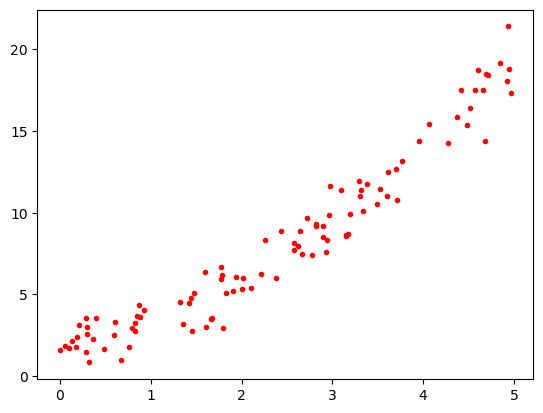

In [2]:
m = 100
X = 5 * np.random.rand(m, 1) 
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X, y, 'r.')

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

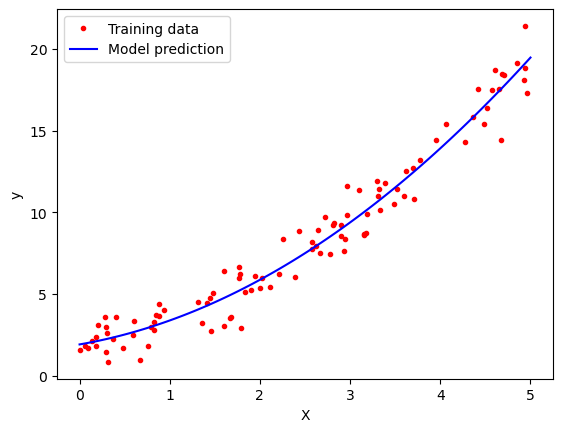

In [5]:
X_new = np.linspace(0, 5, 100).reshape(100, 1)  # Use a sorted range for a smooth curve
X_new_poly = poly_features.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

plt.plot(X, y, "r.", label="Training data")
plt.plot(X_new, y_pred, "b-", label="Model prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Regularizing Linear Models

Regularization is a technique to prevent overfitting by adding a penalty to large weights in your linear model

$J(W) = \frac{1}{m}\sum\limits_{i=1}^{m}(y_i - X_iW)^2 + {Penalty}$


### L1 Regression (Lasso Regression):

Adds $\lambda \sum\limits_{i=1}^{m}|W_i|$ 

* Pushes some weights exactly to zero
* Effectively performs feature selection


### L2 Regression (Ridge Regression):

Adds $\lambda \sum\limits_{i=1}^{m}W_i^2$ 

* Shrinks all weights towards 0 smoothly 
* Doesn't eliminate features, just reduces their influence